In [1]:
import requests
import numpy as np
import matplotlib.pylab as plots
from datascience import *
import pandas as pd
%matplotlib inline
plots.style.use('fivethirtyeight')


In [2]:
little_women = Table.read_table("little_women.csv").select("Characters", "Periods")
little_women

Characters,Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


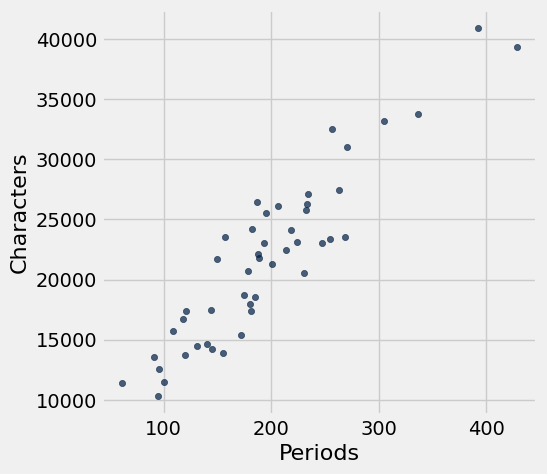

In [3]:
little_women.scatter("Periods", "Characters")

In [4]:
def unit_standar(x):
    mu=np.mean(x)
    sigma=np.std(x)    
    xstandar = (x-mu)/sigma
    return xstandar

def correlation0(table):
    periods_new = unit_standar(table.column(0))    
    character_new = unit_standar(table.column(1))   
    r = np.mean(character_new*periods_new)
    return r

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b


def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  

def lw_errors(lw_reg_slope, lw_reg_intercept, x_values, y_values):
    y_estimated = lw_reg_slope * x_values + lw_reg_intercept
    errors = y_values - y_estimated

    plots.scatter(x, y, color='navy', alpha=0.7)
    plots.plot(x,y_estimated , color='deepskyblue', linewidth=2)
    
    # Graficar los errores
    for i in range(len(x)):
        if(i%4==0):
            plots.plot([x[i], x[i]], [y[i], y_estimated[i]], color='red', linewidth=1.5)
    
    plots.xlabel("Periods")
    plots.ylabel("Characters")
    plots.grid(True, linestyle='--', alpha=0.6)
    plots.show()
    return errors, y_estimated




In [5]:
params = (little_women, "Periods", "Characters")
correlation(*params)

0.92295768958548163

In [6]:
predicion = fit(*params)
lw_with_predictions = little_women.with_column('Linear Prediction',predicion )
lw_with_predictions

Characters,Periods,Linear Prediction
21759,189,21183.6
22148,188,21096.6
20558,231,24836.7
25526,195,21705.5
23395,255,26924.1
14622,140,16921.7
14431,131,16138.9
22476,214,23358
33767,337,34056.3
18508,185,20835.7


In [7]:
actual = lw_with_predictions.column('Characters')
predicted = lw_with_predictions.column('Linear Prediction')
errors = actual - predicted

In [8]:
lw_with_predictions.with_column('Error', errors)

Characters,Periods,Linear Prediction,Error
21759,189,21183.6,575.403
22148,188,21096.6,1051.38
20558,231,24836.7,-4278.67
25526,195,21705.5,3820.54
23395,255,26924.1,-3529.13
14622,140,16921.7,-2299.68
14431,131,16138.9,-1707.88
22476,214,23358,-882.043
33767,337,34056.3,-289.317
18508,185,20835.7,-2327.69


In [9]:
lw_reg_slope = slope(little_women, 'Periods', 'Characters')
lw_reg_intercept = intercept(little_women, 'Periods', 'Characters')

Slope of Regression Line:     87.0 characters per period
Intercept of Regression Line: 4745.0 characters


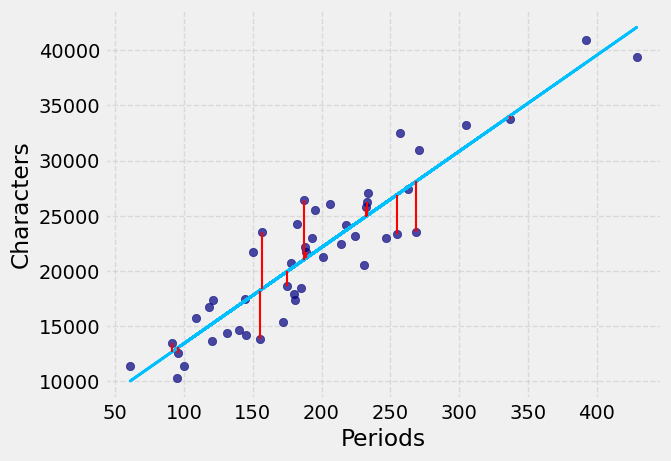

In [10]:
print('Slope of Regression Line:    ', np.round(lw_reg_slope), 'characters per period')
print('Intercept of Regression Line:', np.round(lw_reg_intercept), 'characters')

# Obtener errores y valores estimados
x=little_women.column(1)
y=little_women.column(0)
errors, y_estimated = lw_errors(lw_reg_slope, lw_reg_intercept, x,y)


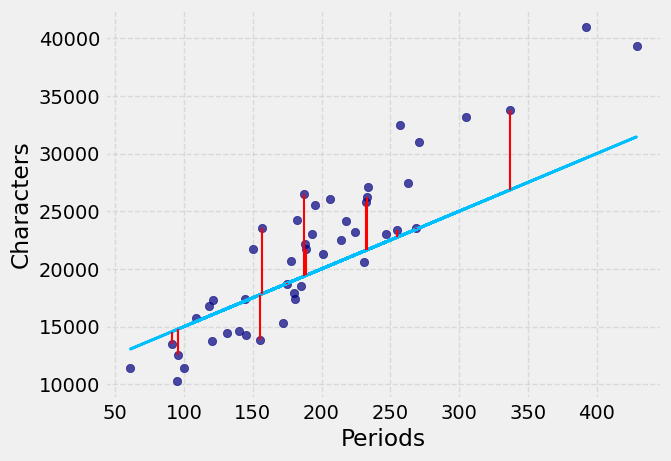

In [11]:
errors, y_estimated = lw_errors(50, 10000, x,y)

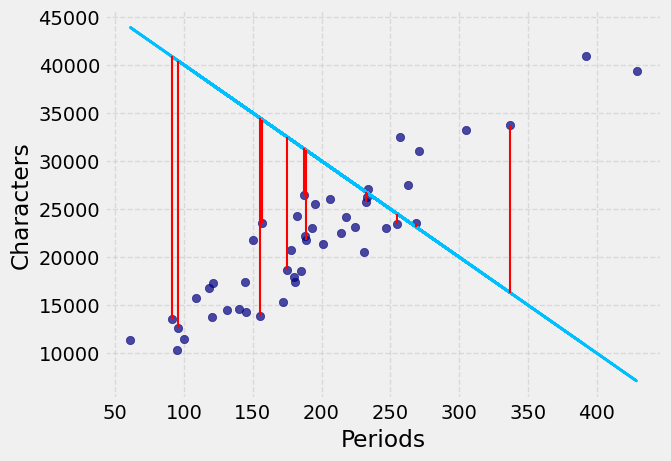

In [12]:
errors, y_estimated = lw_errors(-100, 50000, x,y)

In [13]:
def lw_rmse(slope, intercept,x,y):    
    lw_errors(slope, intercept,x,y)
    fitted = slope * x + intercept
    mse = np.mean((y - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

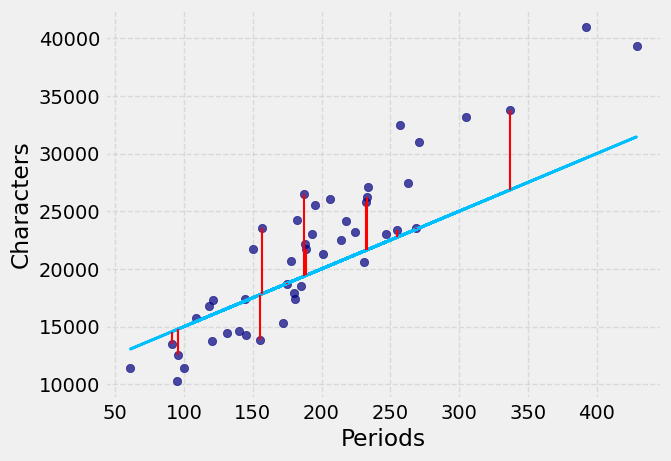

Root mean squared error: 4322.16783177


In [14]:
x = little_women.column('Periods')
y = little_women.column('Characters')
lw_rmse(50, 10000,x, y)


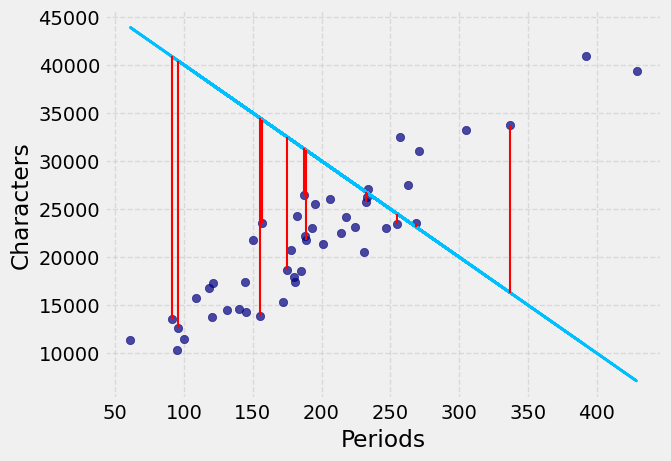

Root mean squared error: 16710.1198374


In [15]:
lw_rmse(-100, 50000, x,y)

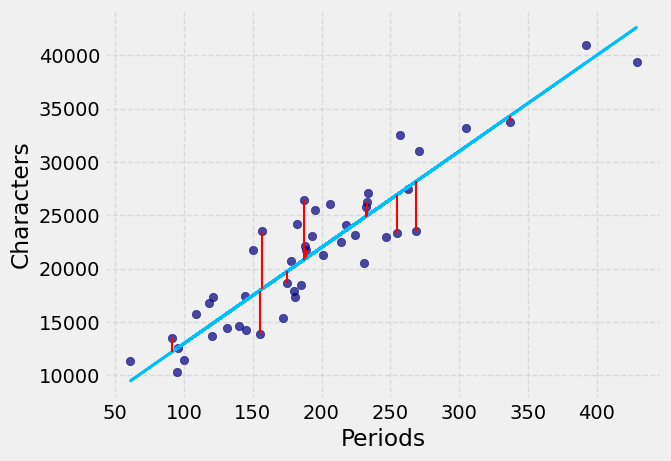

Root mean squared error: 2715.53910638


In [16]:
lw_rmse(90, 4000,x,y)


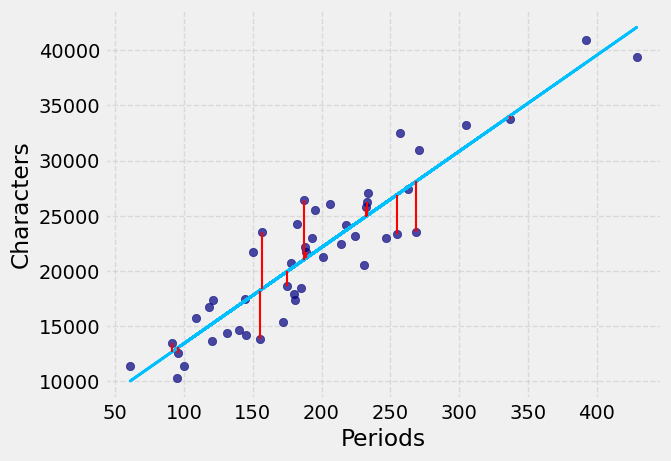

Root mean squared error: 2701.69078531


In [17]:
lw_rmse(lw_reg_slope, lw_reg_intercept, x, y)


In [18]:
def lw_mse(any_slope, any_intercept):
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [19]:
best = minimize(lw_mse)
best

array([   86.97784117,  4744.78484535])

In [20]:
print("slope from formula:        ", lw_reg_slope)
print("slope from minimize:       ", best.item(0))
print("intercept from formula:    ", lw_reg_intercept)
print("intercept from minimize:   ", best.item(1))


slope from formula:         86.9778412583
slope from minimize:        86.97784116615884
intercept from formula:     4744.78479657
intercept from minimize:    4744.784845352655


# Resumen, Regresion lineal 

Los siguinete datos son de la revista **Journal of Exercise Science** en la que se estudió a las atletas universitarios de tiro y examinó la relación entre la fuerza y la distancia de lanzamiento. La población está formada por 28 atletas universitarias. La fuerza se midió por la mayor cantidad (en kilogramos) que el atleta levantó en "power clean"

In [21]:
shotput = Table.read_table('shotput.csv')

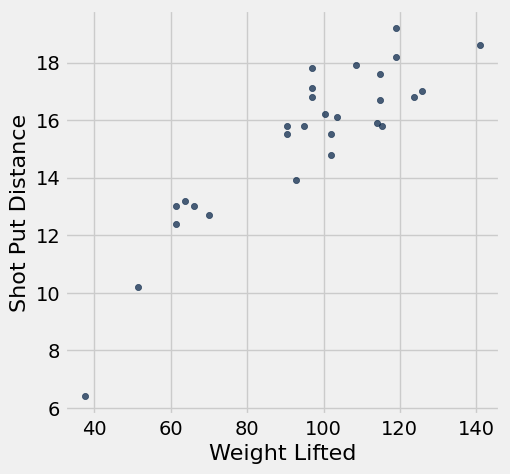

In [22]:
shotput.scatter('Weight Lifted')

In [23]:
slope(shotput, 'Weight Lifted', 'Shot Put Distance')

0.098343821597819972

In [24]:
intercept(shotput, 'Weight Lifted', 'Shot Put Distance')

5.9596290983739522

In [25]:
def shotput_linear_mse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [26]:
minimize(shotput_linear_mse)

array([ 0.09834382,  5.95962911])

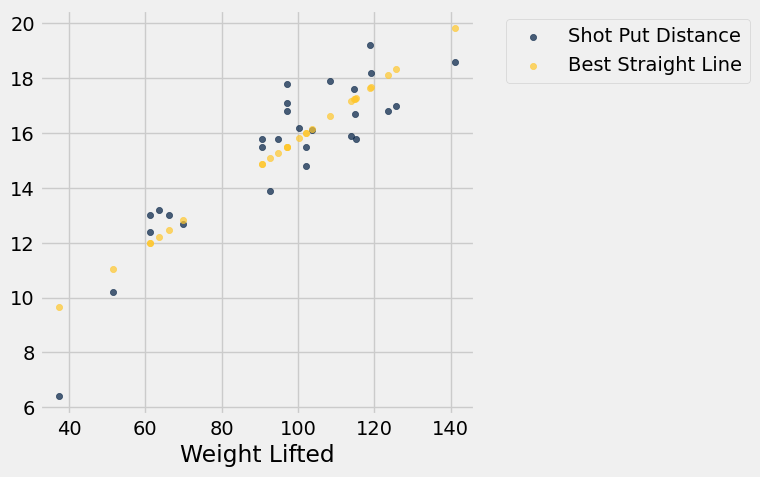

In [27]:
fitted = fit(shotput, 'Weight Lifted', 'Shot Put Distance')
shotput.with_column('Best Straight Line', fitted).scatter('Weight Lifted')

# Regresión no lineal 

In [28]:
def shotput_quadratic_mse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    fitted = a*(x**2) + b*x + c
    return np.mean((y - fitted) ** 2)

In [29]:
best = minimize(shotput_quadratic_mse)
best

array([ -1.04004838e-03,   2.82708045e-01,  -1.53182115e+00])

\begin{equation}
f(x) = ax^2+bx+c
\end{equation}

\begin{equation}
f(x) = -0.00104x+0.2827x-1.5318
\end{equation}

In [30]:
x = shotput.column(0)
shotput_fit = best.item(0)*(x**2) + best.item(1)*x + best.item(2)

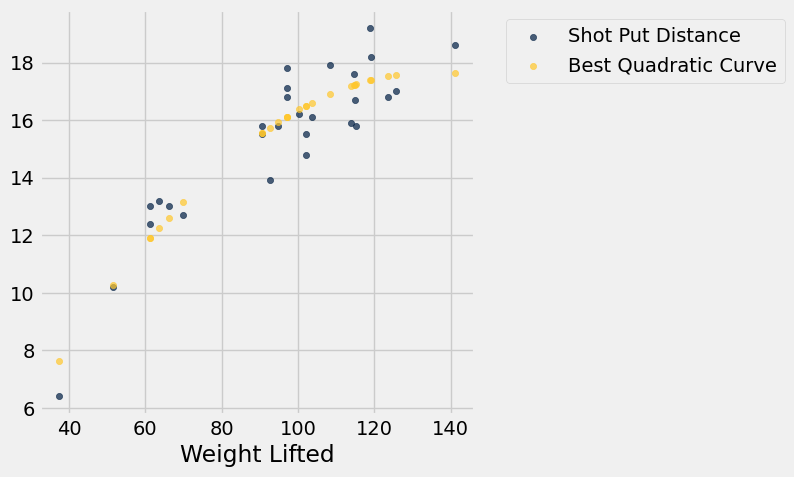

In [31]:
shotput.with_column('Best Quadratic Curve', shotput_fit).scatter(0)

# Residuos

In [32]:
def residual(table, x, y):
    return table.column(y) - fit(table, x, y)


In [33]:
data=Table.read_table("family_heights.csv")
pul_to_cm=2.54 
altura_media_cm = (data.column("father") + data.column("mother"))*pul_to_cm/2
heights = Table().with_columns("MidParent", altura_media_cm, "Child", pul_to_cm*data.column("child"))

In [34]:
heights = heights.with_columns(
        'Fitted Value', fit(heights, 'MidParent', 'Child'),
        'Residual', residual(heights, 'MidParent', 'Child')
    )
heights

MidParent,Child,Fitted Value,Residual
184.785,185.928,179.842,6.08617
184.785,175.768,179.842,-4.07383
184.785,175.26,179.842,-4.58183
184.785,175.26,179.842,-4.58183
180.34,186.69,176.888,9.80185
180.34,184.15,176.888,7.26185
180.34,166.37,176.888,-10.5181
180.34,166.37,176.888,-10.5181
176.53,180.34,174.356,5.98358
176.53,172.72,174.356,-1.63642


In [35]:
def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plots.plot(table.column(x), fit(table, x, y), lw=4, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

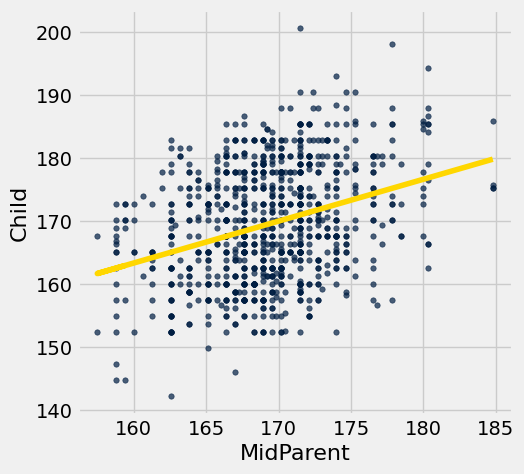

In [36]:
scatter_fit(heights, 'MidParent', 'Child')

In [37]:
def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')

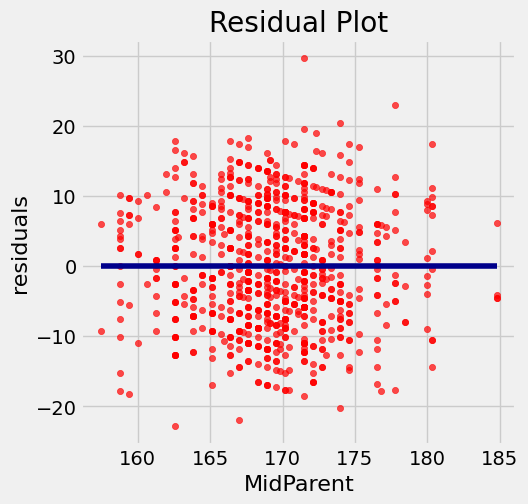

In [38]:
residual_plot(heights, 'MidParent', 'Child')

# Diagnostico de la regresion 

In [39]:
def regression_diagnostic_plots(table, x, y):
    scatter_fit(table, x, y)
    residual_plot(table, x, y)

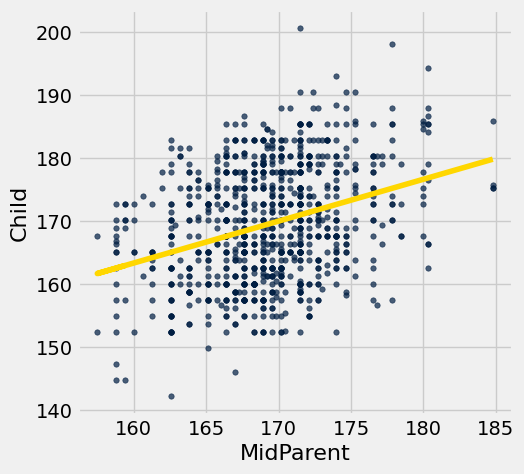

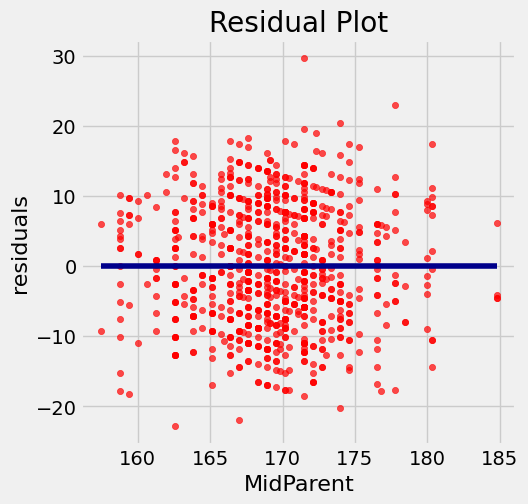

In [40]:
regression_diagnostic_plots(heights, 'MidParent', 'Child')

El gráfico residual de una buena regresión no muestra ningún patrón. Los residuos se ven casi iguales, por encima y por debajo de la línea horizontal en 0, a través del rango de la variable predictora.

# Detección de no linealidad



## Datos sobre Dugongos

Nuestros datos son un conjunto de datos sobre la edad y la longitud de los dugongos, que son mamíferos marinos relacionados con los manatíes y las vacas marinas ([imagen de Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Dugong_Marsa_Alam.jpg)). 

Los datos están en una tabla llamada `dugong`. La edad se mide en años y la longitud en metros. Debido a que los dugongos tienden a no llevar un registro de sus cumpleaños, las edades se estiman en función de variables como la condición de sus dientes.


In [41]:
dugong = Table.read_table('dugong.csv')
dugong = dugong.move_to_start('Length')
dugong

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5
2.27,4
2.15,5
2.26,5
2.35,7
2.47,8


In [42]:
correlation(dugong, 'Length', 'Age')



0.82964745549057139

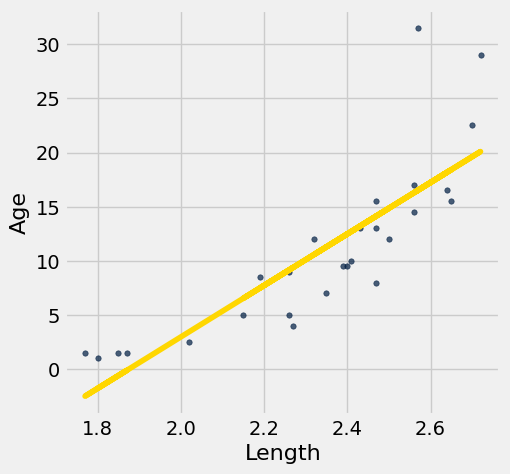

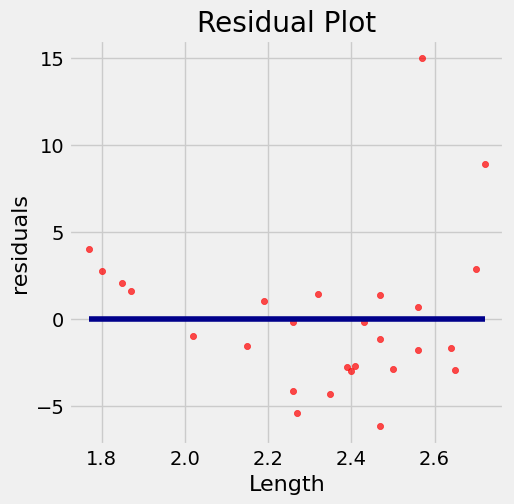

In [43]:
regression_diagnostic_plots(dugong, 'Length', 'Age')

En el extremo inferior de las longitudes, los residuos son casi todos positivos; luego son casi todos negativos; luego positivas de nuevo en el extremo superior de las longitudes. En otras palabras, las estimaciones de regresión tienen un patrón de ser demasiado alto, luego demasiado bajo, luego demasiado alto. Eso significa que hubiera sido mejor usar una curva en lugar de una línea recta para estimar las edades.



# 📌 Heterocedasticidad en Regresión

La **heterocedasticidad** ocurre en un modelo de regresión cuando la varianza de los errores (residuales) no es constante a lo largo del rango de valores de la variable independiente.

## 🔍 ¿Cómo identificarla?
Si en un **gráfico de residuos** (residuales vs. valores ajustados) notas que la dispersión de los puntos cambia de forma desigual, por ejemplo, en forma de abanico o embudo, esto indica **heterocedasticidad**.

## 🎯 Consecuencias:
- **Estimaciones ineficientes:** Los coeficientes de la regresión pueden seguir siendo insesgados, pero sus errores estándar serán incorrectos.
- **Inferencias erróneas:** Las pruebas de hipótesis y los intervalos de confianza pueden ser poco confiables.

## 🛠 Soluciones:
- Aplicar una **transformación** a la variable dependiente (logaritmo, raíz cuadrada, etc.).
- Usar **estimadores robustos** a heterocedasticidad (como errores estándar robustos de White).
- Considerar un **modelo diferente** (como regresión ponderada).

Si el gráfico residual muestra una variación desigual sobre la línea horizontal en 0, las estimaciones de regresión no son igualmente precisas en todo el rango de la variable predictora.
